# Random Forest ~Ensemble Model~

決定木を弱学習器とする集団学習アルゴリズム    
森の作り方
    1. 訓練データからランダムサンプリングしてm個のサブセットを作成
    2. 各サブセットに対し木を作る。木の作り方は、
        - 説明変数のうちn個をランダムで抽出し、もっともよく分類するものをノードにし、その閾値を定める
訓練データ、説明変数どちらもランダムサンプリングしているところが、弱学習器たる所以。

長所:    
    - 説明変数が多数であってもうまく働く
    - 学習・評価が高速
    - 決定木の学習は完全に独立しており、並列に処理可能(sklearn内に実装)
    - 説明変数の重要度（寄与度）を算出可能


In [2]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

## scikit-learnの分類器を使用

In [12]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(train_X, train_y)

In [10]:
pred_y = clf.predict(test_X)
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.96479751388178125

## Confusion Matrix
混同行列: 情報の欠損を少なく、分類問題の精度を測る。

In [17]:
category_dict = dict([(x, str(x)) for x in range(10)])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(category_dict))
    plt.xticks(tick_marks, category_dict, rotation=45)
    plt.yticks(tick_marks, category_dict)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[674   0   0   0   1   1   3   0   3   2]
 [  0 768   3   3   0   1   2   1   1   0]
 [  4   1 662   2   2   0   4   3   5   0]
 [  0   0  11 688   0   4   1   4  12   4]
 [  2   1   2   0 667   0   3   2   1  11]
 [  0   0   2  12   3 619   4   1   5   1]
 [  2   2   1   0   2   3 666   0   2   0]
 [  0   1   5   2   3   0   0 698   2  11]
 [  1   3   3   0   7   3   1   0 644   4]
 [  2   2   4   8  10   3   0  11   4 684]]


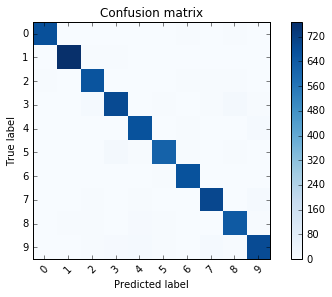

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

## 応用
- modelのパラメータを調整して精度をあげてみる。grid_searchなど。
- n_estimatorsと精度の関係性を調べる
- n_jobs=-1として並列処理の威力を知る